<a href="https://colab.research.google.com/github/lijin-durairaj-code-mode/machine-learning/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import imshow

#sklearn imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer,f1_score

#keras
from keras.preprocessing.image import ImageDataGenerator

#data
_data=pd.read_csv('./sample_data/train.csv')
y=_data['label']
x=_data.drop(labels=['label'],axis=1)
_test_data=pd.read_csv('./sample_data/test.csv')

In [ ]:
datagen = ImageDataGenerator(featurewise_center=True,rotation_range=(0-30),width_shift_range=0.2,
                             height_shift_range=0.2,brightness_range=[0.5,1.5],
                             shear_range=0.2, zoom_range=0.2,channel_shift_range=0.2,
                             horizontal_flip=True, vertical_flip=True,fill_mode='nearest')
datagen.flow()

In [ ]:
pipelines=Pipeline([
                    ('scaler',StandardScaler()),
                    ('mdl','passthrough')
])
parameter=[
           {
               'mdl':[RandomForestClassifier()]
           }
]
scorer = make_scorer(f1_score, average = 'weighted')
grid_search=GridSearchCV(pipelines,parameter,cv=10,verbose=3,n_jobs=-1,scoring=scorer)
# grid_search.fit(x,y)

In [ ]:
grid_search.best_score_

0.9647637168466158

In [ ]:

# grid_search.predict()
_result=grid_search.predict(_test_data)


In [ ]:
_result[0:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3])

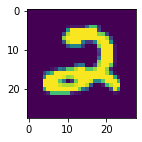

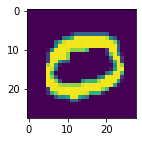

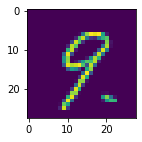

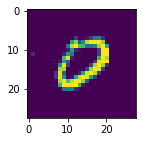

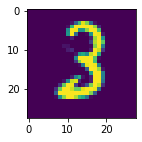

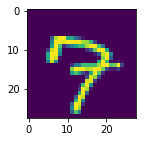

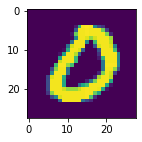

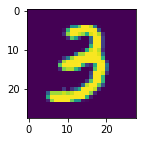

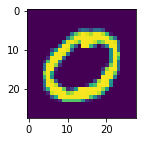

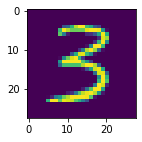

In [ ]:
# _d=_test_data.values.reshape(-1,28,28,1)
for _i in range(0,10):
  plt.subplots(figsize=(2,2))
  imshow(_test_data.values[_i].reshape(28,28))